텐서플로우로 Regression 모델을 만들어봅시다

In [1]:
# 가상의 데이터셋 만들기

import numpy as np
import matplotlib.pyplot as plt

x= np.random.uniform(low=-2, high=2, size=200)
y= [np.random.normal(loc=0.0, scale=(0.5+t*t/3)) for t in x]
y= 1.726*x-0.84+np.array(y)

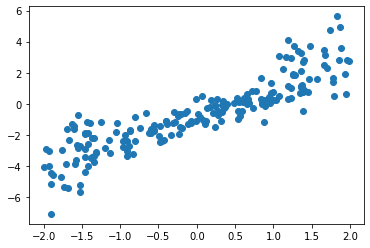

In [2]:
plt.scatter(x,y)

In [3]:
# train, test 나누기
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [4]:
x_train.shape

(150,)

In [5]:
x_train = np.expand_dims(x_train,1)  # dimension 추가, dense layer의 최소 dim이 2임

In [6]:
x_train.shape

(150, 1)

tf.keras Sequential API로 손쉽게 모델을 구성할 수 있다. 

In [7]:
import tensorflow as tf

# 1. 모델 만들기
model = tf.keras.models.Sequential([  
  tf.keras.layers.Dense(1)  
])

In [8]:
# 2. 모델 컴파일
model.compile(optimizer='sgd', loss='mse')

# 3. 모델 학습하기
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
5/5 [==============================] - 1s 79ms/step - loss: 5.5447 - val_loss: 3.0104
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 4.4502 - val_loss: 2.4186
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 3.6450 - val_loss: 1.9640
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 3.0234 - val_loss: 1.6268
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 2.5578 - val_loss: 1.3740
Epoch 6/10
5/5 [==============================] - 0s 30ms/step - loss: 2.2047 - val_loss: 1.1925
Epoch 7/10
5/5 [==============================] - 0s 16ms/step - loss: 1.9477 - val_loss: 1.0557
Epoch 8/10
5/5 [==============================] - 0s 16ms/step - loss: 1.7443 - val_loss: 0.9492
Epoch 9/10
5/5 [==============================] - 0s 15ms/step - loss: 1.5896 - val_loss: 0.8739
Epoch 10/10
5/5 [==============================] - 0s 14ms/step - loss: 1.4750 - val_loss: 0.8161


https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

In [9]:
dir(model)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca

In [10]:
??model

In [11]:
dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_chief_worker_only',
 '_implements_predict_batch_hooks',
 '_implements_test_batch_hooks',
 '_implements_train_batch_hooks',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_supports_tf_logs',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [12]:
history.history

{'loss': [5.5446624755859375,
  4.450182914733887,
  3.6449735164642334,
  3.0234262943267822,
  2.5577821731567383,
  2.2046959400177,
  1.9477406740188599,
  1.7443349361419678,
  1.5895724296569824,
  1.4749830961227417],
 'val_loss': [3.010378360748291,
  2.418576955795288,
  1.9640201330184937,
  1.6267911195755005,
  1.3739873170852661,
  1.1925256252288818,
  1.0557461977005005,
  0.9492471814155579,
  0.8738751411437988,
  0.8160891532897949]}

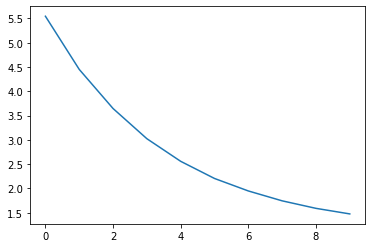

In [13]:
plt.plot(history.history['loss'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
type(model.layers)

list

In [17]:
dir(model.layers[0])

['_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_cast_single_input',
 '_checkpoint_dependencies',
 '_clear_losses',
 '_compute_dtype',
 '_compute_dtype_object',
 '_dedup_weights',
 '_default_training_arg',
 '_deferred_dependencies',
 '_d

In [18]:
model.layers[0].bias

<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.46481407], dtype=float32)>

In [19]:
a= model.layers[0].bias[0].numpy()
print(a)

-0.46481407


In [20]:
model.layers[0].weights[0]

<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.2938304]], dtype=float32)>

In [21]:
w=model.layers[0].weights[0][0][0].numpy()
print(w)

1.2938304


In [22]:
y_test.shape


(50,)

In [23]:
model.predict(y_test[[0]])

array([[-2.5970802]], dtype=float32)

In [24]:
y_test[0]

-1.648025878654021

In [25]:
model.predict([2])

array([[2.1228466]], dtype=float32)

In [26]:
def y_func(x):
  return a+w*x

In [27]:
y_func= lambda x: a + w * x

In [28]:
y_func(2)

2.1228467226028442

In [29]:
pred_y = model.predict(x)

In [30]:
pred_y.shape

(200, 1)

In [31]:
import pandas as pd
df = pd.DataFrame({'x':x, 'true_y':y, 'pred_y':pred_y[:,0]})

In [32]:
df

,x,true_y,pred_y
0,1.388527,-0.431780,1.331704
1,0.318989,-1.088591,-0.052096
2,-1.436692,-1.139960,-2.323650
3,-1.563648,-2.670324,-2.487910
4,0.974692,0.313716,0.796272
...,...,...,...
195,-0.555062,-1.695920,-1.182971
196,-0.314451,-1.253781,-0.871661
197,1.354981,1.153193,1.288301
198,0.241722,-0.083571,-0.152067


In [33]:
df.loc[:150,'type_'] = 'train'
df.loc[150:,'type_'] = 'test'

In [34]:
df

,x,true_y,pred_y,type_
0,1.388527,-0.431780,1.331704,train
1,0.318989,-1.088591,-0.052096,train
2,-1.436692,-1.139960,-2.323650,train
3,-1.563648,-2.670324,-2.487910,train
4,0.974692,0.313716,0.796272,train
...,...,...,...,...
195,-0.555062,-1.695920,-1.182971,test
196,-0.314451,-1.253781,-0.871661,test
197,1.354981,1.153193,1.288301,test
198,0.241722,-0.083571,-0.152067,test


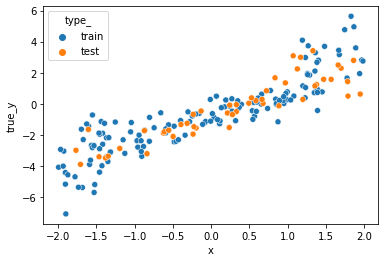

In [35]:
import seaborn as sns
sns.scatterplot(data=df, x='x', y='true_y', hue='type_')

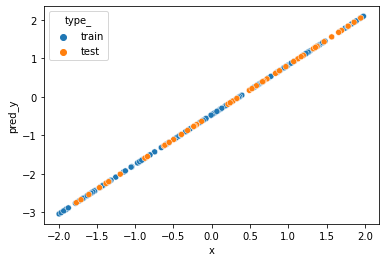

In [36]:
import seaborn as sns
sns.scatterplot(data=df, x='x', y='pred_y', hue='type_')